<a href="https://colab.research.google.com/github/praveenmanupati/test/blob/master/mnsit_ocr_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import load_model, model_from_json
import matplotlib.pyplot as plt
import matplotlib.image as utils
from PIL import Image
import numpy as np
from skimage.transform import resize

In [0]:
def preprocess_image(x):
    # Resize the image to have the shape of (96,96)
    x = resize(x, (target_size, target_size),
            mode='constant',
            anti_aliasing=False)
    
    # convert to 3 channel (RGB)
    x = np.stack((x,)*3, axis=-1) 
    #print(x.shape)
    return x.astype(np.float32)

In [0]:
def show_images(images):
    """
    images : numpy arrays
    """
    n_images = len(images)
    for i in range(len(images)):
        images[i] = np.flip(images[i],1)
        images[i] = np.rot90(images[i])
        
        
    titles = ['(%d)' % i for i in range(1, n_images + 1)]
    num = 5
    iter_num = np.ceil(n_images / num).astype(int)
    for i in range(iter_num):
        fig = plt.figure()
        sub_images = images[i * num:num * (i + 1)]
        sub_titles = titles[i * num:num * (i + 1)]
        for n, (image, title) in enumerate(zip(sub_images, sub_titles)):
            a = fig.add_subplot(1, np.ceil(len(sub_images)), n + 1)
            if image.ndim == 2:
                plt.gray()
            a.set_title(title, fontsize=15)
            plt.imshow(image)

In [61]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
# model.summary()

Loaded model from disk


In [62]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']
print(len(characters))

47


(96, 96, 3)
(1, 96, 96, 3)
[[1.9573042e-02 2.0043193e-05 1.2512572e-04 8.8652023e-06 1.3065435e-05
  3.5660505e-06 5.7611185e-05 1.6055050e-06 6.1550672e-05 1.8804209e-04
  7.6756330e-04 1.9041033e-03 5.8772095e-04 1.3897762e-04 2.3596886e-05
  9.3682851e-05 2.5693656e-04 6.0261555e-06 2.4220739e-05 9.8956730e-07
  6.4162100e-06 2.7493083e-05 2.5020110e-05 6.9464095e-06 1.5945781e-03
  2.0675518e-04 9.7057468e-01 8.5144263e-04 2.8027796e-05 6.4727528e-06
  4.2974945e-05 1.5788559e-06 2.3982797e-05 2.0781921e-05 7.2565745e-06
  5.9474519e-06 1.8791786e-03 2.8512208e-05 1.9217872e-04 8.4669235e-05
  2.2453862e-05 2.8110966e-05 1.0157086e-05 1.3815058e-05 4.0501222e-04
  2.5212377e-05 2.3933260e-05]]
[26]
P


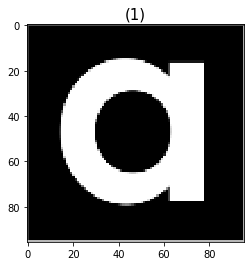

In [72]:
target_size = 96
# x = utils.imread('a_lower.png')
x = Image.open('/content/images/a_lower1.png').convert("L")
x = np.invert(x)
x = np.flip(x,1)
x = np.rot90(x)
x = preprocess_image(x)
show_images([x])
print(x.shape)

# x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
# print(x.shape)

out = model.predict(x)
print(out)
p = np.argmax(out,axis=1)
print(p)
print(characters[p[0]-1])